Support Vector Machines (SVM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

Load dataset

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

Standardize features

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_vis = X[:, :2]

Split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train SVM with Linear kernel

In [6]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

Train SVM with RBF kernel

In [7]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

SVC(C=1)

 Visualize decision boundary

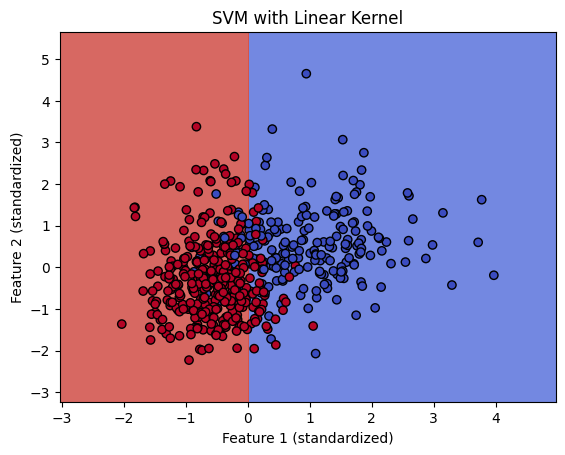

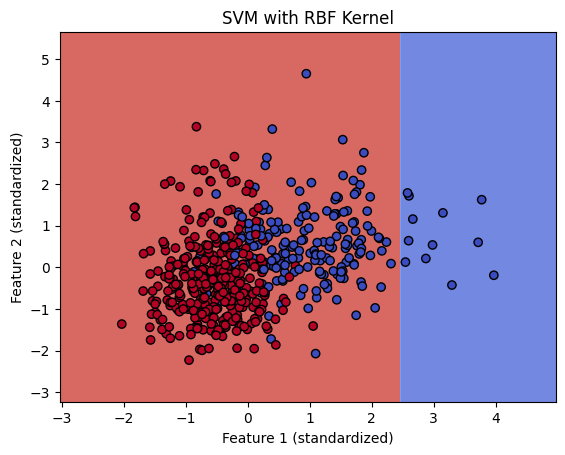

In [10]:
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    X_mean = np.mean(X_train, axis=0)


    X_pred_input = np.zeros((xx.ravel().shape[0], X_train.shape[1]))
    X_pred_input[:, 0] = xx.ravel()
    for i in range(2, X_train.shape[1]):
        X_pred_input[:, i] = X_mean[i]

    Z = model.predict(X_pred_input)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Feature 1 (standardized)")
    plt.ylabel("Feature 2 (standardized)")
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X_vis, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_vis, y, "SVM with RBF Kernel")

Hyperparameter tuning with GridSearchCV

In [11]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=0)
grid.fit(X_train, y_train)

print("Best Parameters from GridSearch:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Best Parameters from GridSearch: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9736263736263737


 Evaluate performance

In [12]:
y_pred = grid.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Cross-validation on best model

In [13]:
scores = cross_val_score(grid.best_estimator_, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV accuracy: 0.9736376339077782
